# Run imaging element workflow

This notebook walks you through the steps to run the ephys workflow.  
The workflow requires tiff files collected from scanimage acquisition software and the output data of either CaImAn or Suite2p.  
A typical organization of the files is as follows:  

```
imaging_root_data_dir/
└───<subject1>/                     # Subject name in `subjects.csv`
│   └───<session0>/                 # Session directory in `sessions.csv`
│   │   │   scan_0001.tif
│   │   │   scan_0002.tif
│   │   │   scan_0003.tif
│   │   │   ...
│   │   └───suite2p/
│   │       │   ops1.npy
│   │       └───plane0/
│   │       │   │   ops.npy
│   │       │   │   spks.npy
│   │       │   │   stat.npy
│   │       │   │   ...
│   │       └───plane1/
│   │           │   ops.npy
│   │           │   spks.npy
│   │           │   stat.npy
│   │           │   ...
│   │   └───caiman/
│   │       │   analysis_results.hdf5
│   └───<session1>/                 # Session directory in `sessions.csv`
│   │   │   scan_0001.tif
│   │   │   scan_0002.tif
│   │   │   ...
└───<subject2>/                     # Subject name in `subjects.csv`
│   │   ...
```



Let's start by importing the relevant modules.

In [32]:
import datajoint as dj
import numpy as np
from u19_pipeline import imaging, acquisition, subject
from u19_pipeline.imaging_element import imaging_element, scan_element, get_scan_image_files
from u19_pipeline.ingest.imaging_element_ingest import process_scan
import pathlib

The module imaging_element contains all the tables designed in the DataJoint imaging element, we could draw the diagram to see the schema structures

In [ ]:
dj.Diagram(acquisition.Session) + dj.Diagram(imaging_element) + dj.Diagram(scan_element)

# Ingest into table `scan_element.Scan`

In the U19 pipeline, we have a table `imaging.Scan` that stores the scan information, in the imaging element, there are native scan tables to take care of the Scan meta information. We provided a function `u19_pipeline.ingest_imaging_element_ingest.process_scan` that ingest into table `scan_element.Scan` using information in the existing pipeline, for example the path to the tiff files.

In [3]:
key = (imaging.Scan & dict(session_date='2021-03-02', subject_fullname='testuser_imaging_pipe1')).fetch1('KEY')
process_scan(key)

TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPa

TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPa

In [7]:
scan_element.ScanInfo.populate(key, display_progress=True)

ScanInfo:   0%|          | 0/2 [00:00<?, ?it/s]TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virtual frames: page offsets not equidistant
TiffPages: failed to load virt

# Process Suite2p output

We are then able to process the Suite2p output. 
To do that, we need to ingest into several manual tables for Suite2p.

## Ingest into ProcessingParamSet for Suite2p

In [38]:
# ingest parameters for Suite2p
pars = {
    'look_one_level_down': 0.0,
    'fast_disk': [],
    'delete_bin': False,
    'mesoscan': False,
    'h5py': [],
    'h5py_key': 'data',
    'save_path0': [],
    'subfolders': [],
    'nplanes': 1,
    'nchannels': 1,
    'functional_chan': 1,
    'tau': 1.0,
    'fs': 10.0,
    'force_sktiff': False,
    'preclassify': 0.0,
    'save_mat': False,
    'combined': True,
    'aspect': 1.0,
    'do_bidiphase': False,
    'bidiphase': 0.0,
    'do_registration': True,
    'keep_movie_raw': False,
    'nimg_init': 300,
    'batch_size': 500,
    'maxregshift': 0.1,
    'align_by_chan': 1,
    'reg_tif': False,
    'reg_tif_chan2': False,
    'subpixel': 10,
    'smooth_sigma': 1.15,
    'th_badframes': 1.0,
    'pad_fft': False,
    'nonrigid': True,
    'block_size': [128, 128],
    'snr_thresh': 1.2,
    'maxregshiftNR': 5.0,
    '1Preg': False,
    'spatial_hp': 50.0,
    'pre_smooth': 2.0,
    'spatial_taper': 50.0,
    'roidetect': True,
    'sparse_mode': False,
    'diameter': 12,
    'spatial_scale': 0,
    'connected': True,
    'nbinned': 5000,
    'max_iterations': 20,
    'threshold_scaling': 1.0,
    'max_overlap': 0.75,
    'high_pass': 100.0,
    'inner_neuropil_radius': 2,
    'min_neuropil_pixels': 350,
    'allow_overlap': False,
    'chan2_thres': 0.65,
    'baseline': 'maximin',
    'win_baseline': 60.0,
    'sig_baseline': 10.0,
    'prctile_baseline': 8.0,
    'neucoeff': 0.7,
    'xrange': np.array([0, 0]),
    'yrange': np.array([0, 0])}


imaging_element.ProcessingParamSet.insert_new_params(
    'suite2p', 0, 'Calcium imaging analysis with Suite2p using default Suite2p parameters', pars)

In [9]:
imaging_element.ProcessingParamSet()

paramset_idx,processing_method,paramset_desc,param_set_hash,params dictionary of all applicable parameters
0,suite2p,Calcium imaging analysis with Suite2p using default Suite2p parameters,be32de46-f21d-d714-d131-ec89817de806,=BLOB=


## Ingest into ProcessingTask

Then ingest into the table ProcessingTask, this table serves as a mark when a Suite2p session is done. The field `processing_output_dir` is the directory that contains the Suite2p output. In the future release of imaging element, this table serves as a manual trigger to run Suite2p and `processing_output_dir` will be the target directory that saves the output.

In [28]:
imaging.FieldOfView & key

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,fov number of the field of view in this scan,fov_directory the absolute directory created for this fov,fov_name name of the field of view,fov_depth depth of the field of view should be a number or a vector?,fov_center_xy X-Y coordinate for the center of the FOV in microns. One for each FOV in scan,fov_size_xy X-Y size of the FOV in microns. One for each FOV in scan (sizeXY),fov_rotation_degrees rotation of the FOV with respect to cardinal axes in degrees. One for each FOV in scan,fov_pixel_resolution_xy number of pixels for rows and columns of the FOV. One for each FOV in scan,fov_discrete_plane_mode true if FOV is only defined (acquired) at a single specifed depth in the volume. One for each FOV in scan should this be boolean?
testuser_imaging_pipe1,2021-03-02,0,1,/mnt/bucket/braininit/RigData/mesoscope/imaging/imaging_pipe1/20210302/ROI01_z1/,ROI01_z1,5.8,=BLOB=,=BLOB=,0.0,=BLOB=,0
testuser_imaging_pipe1,2021-03-02,0,2,/mnt/bucket/braininit/RigData/mesoscope/imaging/imaging_pipe1/20210302/ROI02_z1/,ROI02_z1,5.8,=BLOB=,=BLOB=,0.0,=BLOB=,0
testuser_imaging_pipe1,2021-03-02,0,3,/mnt/bucket/braininit/RigData/mesoscope/imaging/imaging_pipe1/20210302/ROI03_z1/,ROI03_z1,5.8,=BLOB=,=BLOB=,0.0,=BLOB=,0


In [36]:
scan_keys = (scan_element.Scan & key).fetch('KEY')
for scan_key in scan_keys:
    session_key = (acquisition.Session & scan_key).fetch1('KEY')
    scan_dir = pathlib.Path((imaging.FieldOfView & session_key &
                             {'fov': scan_key['scan_id']}).fetch1('fov_directory')) 
    imaging_element.ProcessingTask.insert1(
        dict(**scan_key, paramset_idx=0, processing_output_dir=pathlib.Path.joinpath(scan_dir, 'suite2p/')), skip_duplicates=True)
imaging_element.ProcessingTask()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,scan_id,paramset_idx,processing_output_dir output directory of the processed scan relative to root data directory,"task_mode 'load': load computed analysis results, 'trigger': trigger computation"
testuser_imaging_pipe1,2021-03-02,0,1,0,/mnt/bucket/braininit/RigData/mesoscope/imaging/imaging_pipe1/20210302/ROI01_z1/suite2p/,load
testuser_imaging_pipe1,2021-03-02,0,2,0,/mnt/bucket/braininit/RigData/mesoscope/imaging/imaging_pipe1/20210302/ROI02_z1/suite2p,load
testuser_imaging_pipe1,2021-03-02,0,3,0,/mnt/bucket/braininit/RigData/mesoscope/imaging/imaging_pipe1/20210302/ROI03_z1/suite2p,load


Then we are able to populate table `Processing`, `Processing` table is currently just confirming the existence of the suite2p (or caiman) outputs. In future releases, it will be table that call Suite2p processing.

In [37]:
imaging_element.Processing.populate(display_progress=True)

Processing: 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]


## Motion Correction

In [4]:
imaging_element.MotionCorrection.populate(display_progress=True)

MotionCorrection: 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


## Set up Curation

The next step in the pipeline is the curation of segmentation results. If a manual curation was implemented, an entry needs to be manually inserted into the table Curation, which specifies the directory to the curated results in curation_output_dir. If we would like to process the suite2p outcome directly, an entry is also needed in Curation. A method create1_from_clustering_task was provided to help this insertion. It copies the clustering_output_dir in ProcessingTask to the field curation_output_dir in the table Curation with a new curation_id.

In [41]:
processing_keys = (imaging_element.Processing & key).fetch('KEY')
for processing_key in processing_keys:
    imaging_element.Curation().create1_from_processing_task(processing_key)

## Process Segmentation result and downstream tables to extract Fluorescence and Activity

In [42]:
imaging_element.Segmentation.populate(display_progress=True)

Segmentation: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


In [43]:
imaging_element.Fluorescence.populate(display_progress=True)

Fluorescence: 100%|██████████| 1/1 [00:17<00:00, 17.80s/it]


In [44]:
imaging_element.Activity.populate(display_progress=True)

Activity: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


## Visualize masks

The segmented masks are in the table `imaging_element.Segmentation.Mask`

In [52]:
imaging_element.Segmentation.Mask()

subject_fullname username_mouse_nickname,session_date date of experiment,session_number number,scan_id,paramset_idx,curation_id,mask,seg_channel 0-based indexing,mask_npix number of pixels in ROIs,mask_center_x center x coordinate in pixel,mask_center_y center y coordinate in pixel,mask_center_z center z coordinate in pixel,mask_xpix x coordinates in pixels,mask_ypix y coordinates in pixels,mask_zpix z coordinates in pixels,mask_weights weights of the mask at the indices above in column major (Fortran) order
testuser_imaging_pipe1,2021-03-02,0,1,0,1,0,0,105,47,319,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=
testuser_imaging_pipe1,2021-03-02,0,1,0,1,1,0,232,325,228,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=
testuser_imaging_pipe1,2021-03-02,0,1,0,1,2,0,159,339,257,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=
testuser_imaging_pipe1,2021-03-02,0,1,0,1,3,0,164,84,335,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=
testuser_imaging_pipe1,2021-03-02,0,1,0,1,4,0,264,435,117,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=
testuser_imaging_pipe1,2021-03-02,0,1,0,1,5,0,208,111,303,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=
testuser_imaging_pipe1,2021-03-02,0,1,0,1,6,0,238,108,206,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=
testuser_imaging_pipe1,2021-03-02,0,1,0,1,7,0,218,157,335,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=
testuser_imaging_pipe1,2021-03-02,0,1,0,1,8,0,236,446,70,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=
testuser_imaging_pipe1,2021-03-02,0,1,0,1,9,0,174,460,465,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [80]:
scan_key = (scan_element.Scan & key).fetch('KEY')[0]

In [81]:
px_height, px_width = (scan_element.ScanInfo().Field & scan_key).fetch1('px_height', 'px_width')
masks = (imaging_element.Segmentation.Mask & scan_key & 'curation_id=1').fetch()

In [82]:
img = np.full((px_height, px_width), np.nan)

In [83]:
for mask in masks:
    img[mask['mask_xpix'], mask['mask_ypix']] = mask['mask_weights']

In [84]:
import matplotlib.pyplot as plt

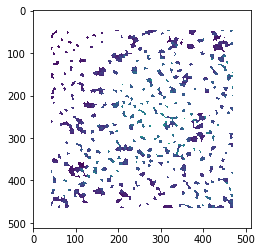

In [85]:
plt.imshow(img)